# Assignment 2:

In [1]:
getwd()

[1] "C:/Users/jonna/OneDrive/Desktop/CDA541 Statistical Data Mining 1/Assignments/Answers/Assignment2"

In [2]:
setwd("C:/Users/jonna/OneDrive/Desktop/CDA541 Statistical Data Mining 1/Assignments/Answers/Assignment2")

## Question 1:

In [3]:
library(ISLR)

In [4]:
data("College")

df = College
head(df)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


In [5]:
dim(df)     #College data is very small dataset

[1] 777  18

In [6]:
str(df)
summary(df)

'data.frame':	777 obs. of  18 variables:
 $ Private    : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ Apps       : num  1660 2186 1428 417 193 ...
 $ Accept     : num  1232 1924 1097 349 146 ...
 $ Enroll     : num  721 512 336 137 55 158 103 489 227 172 ...
 $ Top10perc  : num  23 16 22 60 16 38 17 37 30 21 ...
 $ Top25perc  : num  52 29 50 89 44 62 45 68 63 44 ...
 $ F.Undergrad: num  2885 2683 1036 510 249 ...
 $ P.Undergrad: num  537 1227 99 63 869 ...
 $ Outstate   : num  7440 12280 11250 12960 7560 ...
 $ Room.Board : num  3300 6450 3750 5450 4120 ...
 $ Books      : num  450 750 400 450 800 500 500 450 300 660 ...
 $ Personal   : num  2200 1500 1165 875 1500 ...
 $ PhD        : num  70 29 53 92 76 67 90 89 79 40 ...
 $ Terminal   : num  78 30 66 97 72 73 93 100 84 41 ...
 $ S.F.Ratio  : num  18.1 12.2 12.9 7.7 11.9 9.4 11.5 13.7 11.3 11.5 ...
 $ perc.alumni: num  12 16 30 37 2 11 26 37 23 15 ...
 $ Expend     : num  7041 10527 8735 19016 10922 ...
 $ Grad.Rate  : nu

 Private        Apps           Accept          Enroll       Top10perc    
 No :212   Min.   :   81   Min.   :   72   Min.   :  35   Min.   : 1.00  
 Yes:565   1st Qu.:  776   1st Qu.:  604   1st Qu.: 242   1st Qu.:15.00  
           Median : 1558   Median : 1110   Median : 434   Median :23.00  
           Mean   : 3002   Mean   : 2019   Mean   : 780   Mean   :27.56  
           3rd Qu.: 3624   3rd Qu.: 2424   3rd Qu.: 902   3rd Qu.:35.00  
           Max.   :48094   Max.   :26330   Max.   :6392   Max.   :96.00  
   Top25perc      F.Undergrad     P.Undergrad         Outstate    
 Min.   :  9.0   Min.   :  139   Min.   :    1.0   Min.   : 2340  
 1st Qu.: 41.0   1st Qu.:  992   1st Qu.:   95.0   1st Qu.: 7320  
 Median : 54.0   Median : 1707   Median :  353.0   Median : 9990  
 Mean   : 55.8   Mean   : 3700   Mean   :  855.3   Mean   :10441  
 3rd Qu.: 69.0   3rd Qu.: 4005   3rd Qu.:  967.0   3rd Qu.:12925  
 Max.   :100.0   Max.   :31643   Max.   :21836.0   Max.   :21700  
   Room.Board

In [7]:
#checking missing values?
sum(is.na(df))  #no missing values!!

[1] 0

In [1]:
set.seed(41)

options(warn=-1)
library(tidyverse)
library(caret)

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Loading required package: lattice

Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift



#### (a) Split data into train-test and fit Linear model:

In [9]:
training_samples = df$Apps %>% 
  createDataPartition(p = .8, list = FALSE)

In [10]:
train_data = df[training_samples, ]
test_data = df[-training_samples, ]

In [11]:
linear_model = train(Apps ~ ., data = train_data, method = 'lm')
summary(linear_model)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-3553.5  -430.8     5.5   332.4  6633.8 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -140.50424  439.91427  -0.319 0.749541    
PrivateYes  -361.06483  145.79454  -2.477 0.013538 *  
Accept         1.69530    0.04225  40.125  < 2e-16 ***
Enroll        -0.91987    0.19100  -4.816 1.85e-06 ***
Top10perc     51.26505    5.81408   8.817  < 2e-16 ***
Top25perc    -14.40648    4.54052  -3.173 0.001586 ** 
F.Undergrad    0.03026    0.03336   0.907 0.364743    
P.Undergrad    0.06994    0.03177   2.202 0.028064 *  
Outstate      -0.08037    0.02051  -3.919 9.91e-05 ***
Room.Board     0.12229    0.05018   2.437 0.015095 *  
Books          0.38317    0.29294   1.308 0.191353    
Personal      -0.05594    0.06604  -0.847 0.397312    
PhD           -8.18262    4.80209  -1.704 0.088899 .  
Terminal      -3.41339    5.27560  -0.647 0.517868    
S.F.Ratio      5.047

In [12]:
# The model is is good as R-squared and adjusted R-squared is higher and
# p-value is comparitively lower overall.

In [13]:
pred = predict(linear_model, newdata = test_data)

compare = data.frame(actual = test_data$Apps, predicted = pred)
head(compare,10)

,actual,predicted
Albertson College,587,828.1704
Albion College,1899,2507.7977
Albright College,1038,977.6855
Allentown Coll. of St. Francis de Sales,1179,1788.4226
Amherst College,4302,3472.9640
Appalachian State University,7313,6023.8322
Aquinas College,619,302.1167
Augustana College,761,440.7268
Belmont University,1220,1321.8190
Bentley College,3466,3137.7093


In [14]:
# Error obtained:
linear_model$results

intercept,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
TRUE,1084.414,0.9177633,624.7942,161.9587,0.02336535,44.61854


#### (b) Ridge model:

In [15]:
# Parameter tuning:
param_control = trainControl(method = 'repeatedcv', number = 10, repeats = 5)

ridge_reg_model = train(Apps ~ ., data = train_data, method = 'glmnet', 
                        trControl = param_control, 
                        tuneGrid = expand.grid(alpha =0, 
                                               lambda = seq(0.01, 500, 
                                                          length = 25)))

In [16]:
ridge_reg_model

glmnet 

624 samples
 17 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 563, 562, 560, 562, 562, 562, ... 
Resampling results across tuning parameters:

  lambda     RMSE      Rsquared   MAE     
    0.01000  1139.672  0.9225831  629.3541
   20.84292  1139.672  0.9225831  629.3541
   41.67583  1139.672  0.9225831  629.3541
   62.50875  1139.672  0.9225831  629.3541
   83.34167  1139.672  0.9225831  629.3541
  104.17458  1139.672  0.9225831  629.3541
  125.00750  1139.672  0.9225831  629.3541
  145.84042  1139.672  0.9225831  629.3541
  166.67333  1139.672  0.9225831  629.3541
  187.50625  1139.672  0.9225831  629.3541
  208.33917  1139.672  0.9225831  629.3541
  229.17208  1139.672  0.9225831  629.3541
  250.00500  1139.672  0.9225831  629.3541
  270.83792  1139.672  0.9225831  629.3541
  291.67083  1139.672  0.9225831  629.3541
  312.50375  1139.755  0.9225788  629.3674
  333.33667  1141.006  0.9224979  629.6288
  354.169

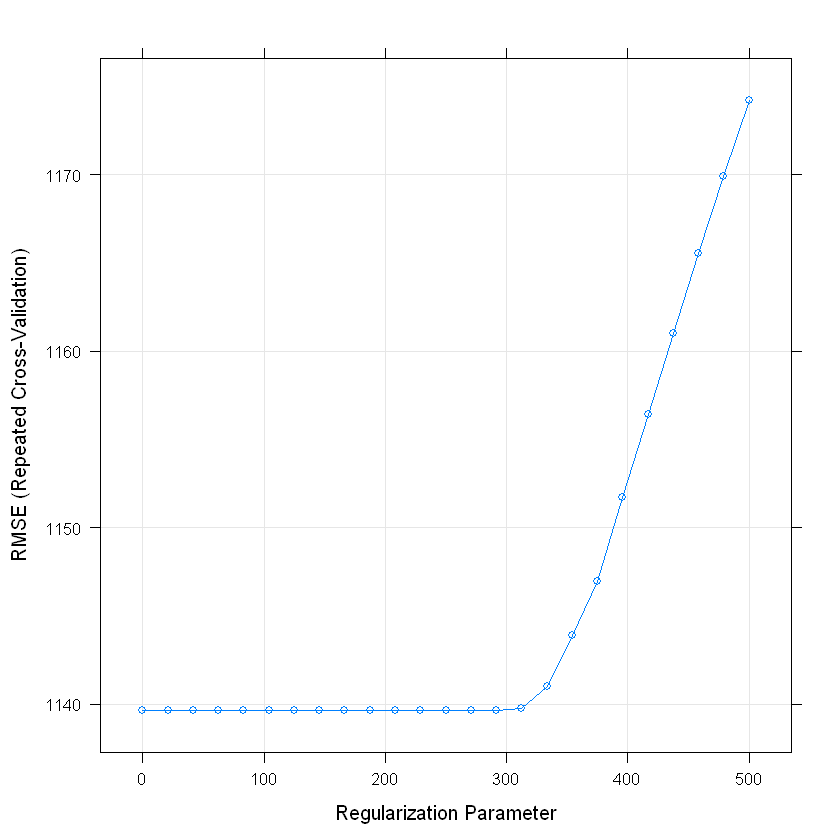

In [17]:
plot(ridge_reg_model)

In [18]:
# Error obtained:
ridge_reg_model$results

alpha,lambda,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
0,0.01000,1139.672,0.9225831,629.3541,574.8718,0.02763403,138.6862
0,20.84292,1139.672,0.9225831,629.3541,574.8718,0.02763403,138.6862
0,41.67583,1139.672,0.9225831,629.3541,574.8718,0.02763403,138.6862
0,62.50875,1139.672,0.9225831,629.3541,574.8718,0.02763403,138.6862
0,83.34167,1139.672,0.9225831,629.3541,574.8718,0.02763403,138.6862
0,104.17458,1139.672,0.9225831,629.3541,574.8718,0.02763403,138.6862
0,125.00750,1139.672,0.9225831,629.3541,574.8718,0.02763403,138.6862
0,145.84042,1139.672,0.9225831,629.3541,574.8718,0.02763403,138.6862
0,166.67333,1139.672,0.9225831,629.3541,574.8718,0.02763403,138.6862
0,187.50625,1139.672,0.9225831,629.3541,574.8718,0.02763403,138.6862


#### (d) Lasso Model:

In [19]:
# Parameter tuning:
param_control = trainControl(method = 'repeatedcv', number = 10, repeats = 5)

lasso_model = train(Apps ~ ., data = train_data, method = 'glmnet', 
                    trControl = param_control, 
                    tuneGrid = expand.grid(alpha = 1, 
                                           lambda = seq(0.01, 100, length = 25)))

In [20]:
lasso_model

glmnet 

624 samples
 17 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 562, 562, 561, 560, 562, 560, ... 
Resampling results across tuning parameters:

  lambda     RMSE      Rsquared   MAE     
    0.01000  1047.642  0.9261715  620.3737
    4.17625  1048.336  0.9265154  617.9576
    8.34250  1047.996  0.9271092  612.7034
   12.50875  1046.992  0.9273916  608.6341
   16.67500  1046.951  0.9275069  605.6637
   20.84125  1048.024  0.9274511  604.2247
   25.00750  1050.152  0.9272321  603.9242
   29.17375  1052.327  0.9270309  603.7412
   33.34000  1054.463  0.9268072  603.4531
   37.50625  1057.308  0.9264477  603.5653
   41.67250  1060.247  0.9260361  603.8921
   45.83875  1062.064  0.9257121  604.0470
   50.00500  1063.210  0.9254380  604.0408
   54.17125  1064.440  0.9251179  604.2864
   58.33750  1065.720  0.9247961  604.4518
   62.50375  1066.572  0.9245461  604.1842
   66.67000  1066.861  0.9243869  603.2313
   70.836

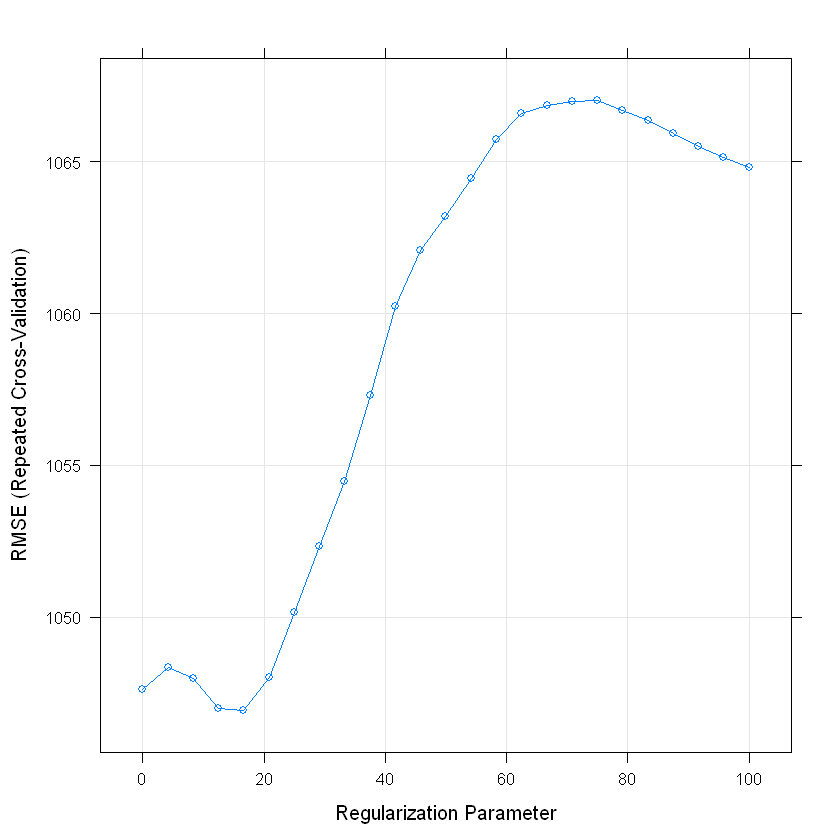

In [21]:
plot(lasso_model)

In [22]:
# Error obtained:
lasso_model$results

alpha,lambda,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
1,0.01000,1047.642,0.9261715,620.3737,315.6468,0.03638406,96.33569
1,4.17625,1048.336,0.9265154,617.9576,323.6362,0.03614373,97.67973
1,8.34250,1047.996,0.9271092,612.7034,334.9202,0.03591728,99.58732
1,12.50875,1046.992,0.9273916,608.6341,338.9001,0.03609402,100.24381
1,16.67500,1046.951,0.9275069,605.6637,342.1308,0.03632816,100.80668
1,20.84125,1048.024,0.9274511,604.2247,344.9012,0.03660692,100.92185
1,25.00750,1050.152,0.9272321,603.9242,347.1707,0.03692506,100.81986
1,29.17375,1052.327,0.9270309,603.7412,349.2721,0.03712216,100.37324
1,33.34000,1054.463,0.9268072,603.4531,350.9905,0.03733698,100.23369
1,37.50625,1057.308,0.9264477,603.5653,352.0353,0.03757289,100.29972


In [23]:
# no.of non-zero estimates:
coef(lasso_model$finalModel, lasso_model$bestTune$lambda)

18 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept) -387.93379121
PrivateYes  -293.06863509
Accept         1.59997966
Enroll        -0.47956774
Top10perc     39.09071464
Top25perc     -5.88673816
F.Undergrad    .         
P.Undergrad    0.04591347
Outstate      -0.05512975
Room.Board     0.10410870
Books          0.24493022
Personal      -0.01786759
PhD           -5.78518170
Terminal      -3.19376641
S.F.Ratio      .         
perc.alumni   -3.91296652
Expend         0.04534940
Grad.Rate      4.41247925

#### (g) Which is best? :

In [24]:
cbind(linear_model$results$Rsquared, 
      ridge_reg_model$results$Rsquared, 
      lasso_model$results$Rsquared)

0.9177633,0.9225831,0.9261715
0.9177633,0.9225831,0.9265154
0.9177633,0.9225831,0.9271092
0.9177633,0.9225831,0.9273916
0.9177633,0.9225831,0.9275069
0.9177633,0.9225831,0.9274511
0.9177633,0.9225831,0.9272321
0.9177633,0.9225831,0.9270309
0.9177633,0.9225831,0.9268072
0.9177633,0.9225831,0.9264477
0.9177633,0.9225831,0.9260361


In [25]:
cbind(linear_model$results$RMSE, 
      ridge_reg_model$results$RMSE, 
      lasso_model$results$RMSE)

1084.414,1139.672,1047.642
1084.414,1139.672,1048.336
1084.414,1139.672,1047.996
1084.414,1139.672,1046.992
1084.414,1139.672,1046.951
1084.414,1139.672,1048.024
1084.414,1139.672,1050.152
1084.414,1139.672,1052.327
1084.414,1139.672,1054.463
1084.414,1139.672,1057.308
1084.414,1139.672,1060.247


#### Based on the error values and accuracy of all 3 models, I would say, all models performed very well.

## Question 2:

In [26]:
df = read.csv("caravan-insurance-challenge.csv")
#head(df)
#str(df)   #origin column is 'str'.
#summary(df)

In [27]:
train_df = subset(df, ORIGIN == 'train')
test_df = subset(df, ORIGIN == 'test')
train_df = subset(train_df, select = -c(ORIGIN))
test_df = subset(test_df, select = -c(ORIGIN))
#str(train_df)
#str(test_df)

In [28]:
dim(train_df)

[1] 5822   86

In [29]:
dim(test_df)

[1] 4000   86

In [30]:
#missing values?
sum(is.na(train_df))  #no missing values

[1] 0

In [31]:
sum(is.na(test_df))   #no missing values

[1] 0

In [32]:
set.seed(41)

#### OLS model:


In [33]:
options(warn=-1)
ols_model = train(CARAVAN ~ ., data = train_df, method = 'lm')
summary(ols_model)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67293 -0.08720 -0.04593 -0.00639  1.04628 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.7685381  0.4298406   1.788 0.073835 .  
MOSTYPE      0.0035209  0.0022512   1.564 0.117866    
MAANTHUI    -0.0072642  0.0076739  -0.947 0.343875    
MGEMOMV     -0.0012739  0.0071737  -0.178 0.859055    
MGEMLEEF     0.0107473  0.0049596   2.167 0.030279 *  
MOSHOOFD    -0.0154869  0.0101044  -1.533 0.125405    
MGODRK      -0.0056016  0.0056016  -1.000 0.317353    
MGODPR      -0.0002069  0.0060664  -0.034 0.972795    
MGODOV       0.0003569  0.0054592   0.065 0.947874    
MGODGE      -0.0030237  0.0058038  -0.521 0.602399    
MRELGE       0.0086829  0.0075479   1.150 0.250036    
MRELSA       0.0020367  0.0072008   0.283 0.777310    
MRELOV       0.0055682  0.0076295   0.730 0.465526    
MFALLEEN    -0.0038250  0.0065474  -0.584 0.559107    
MFGEKIND  

#### The model is good as R-squared and adjusted R-squared is higher and p-value is comparitively lower overall.

In [34]:
pred = predict(ols_model, newdata = test_df)

compare = data.frame(actual = test_df$CARAVAN, predicted = pred)
head(compare,10)

,actual,predicted
5823,0,0.014441132
5824,1,0.215946829
5825,0,0.099937482
5826,0,0.095439888
5827,0,0.005945841
5828,0,0.027520016
5829,0,0.101836066
5830,0,0.059439617
5831,0,0.097974707
5832,0,0.165365361


In [35]:
# Error obtained:
ols_model$results

intercept,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
TRUE,0.2363827,0.0347082,0.1168571,0.00578745,0.007201092,0.002507655


#### Backward Selection:


In [36]:
bwd_model = lm(CARAVAN ~ ., data = train_df)
summary(bwd_model)


Call:
lm(formula = CARAVAN ~ ., data = train_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67293 -0.08720 -0.04593 -0.00639  1.04628 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.7685381  0.4298406   1.788 0.073835 .  
MOSTYPE      0.0035209  0.0022512   1.564 0.117866    
MAANTHUI    -0.0072642  0.0076739  -0.947 0.343875    
MGEMOMV     -0.0012739  0.0071737  -0.178 0.859055    
MGEMLEEF     0.0107473  0.0049596   2.167 0.030279 *  
MOSHOOFD    -0.0154869  0.0101044  -1.533 0.125405    
MGODRK      -0.0056016  0.0056016  -1.000 0.317353    
MGODPR      -0.0002069  0.0060664  -0.034 0.972795    
MGODOV       0.0003569  0.0054592   0.065 0.947874    
MGODGE      -0.0030237  0.0058038  -0.521 0.602399    
MRELGE       0.0086829  0.0075479   1.150 0.250036    
MRELSA       0.0020367  0.0072008   0.283 0.777310    
MRELOV       0.0055682  0.0076295   0.730 0.465526    
MFALLEEN    -0.0038250  0.0065474  -0.584 0.559107    
MFGEKI

In [37]:
step(bwd_model, direction = 'backward')

Start:  AIC=-17029.26
CARAVAN ~ MOSTYPE + MAANTHUI + MGEMOMV + MGEMLEEF + MOSHOOFD + 
    MGODRK + MGODPR + MGODOV + MGODGE + MRELGE + MRELSA + MRELOV + 
    MFALLEEN + MFGEKIND + MFWEKIND + MOPLHOOG + MOPLMIDD + MOPLLAAG + 
    MBERHOOG + MBERZELF + MBERBOER + MBERMIDD + MBERARBG + MBERARBO + 
    MSKA + MSKB1 + MSKB2 + MSKC + MSKD + MHHUUR + MHKOOP + MAUT1 + 
    MAUT2 + MAUT0 + MZFONDS + MZPART + MINKM30 + MINK3045 + MINK4575 + 
    MINK7512 + MINK123M + MINKGEM + MKOOPKLA + PWAPART + PWABEDR + 
    PWALAND + PPERSAUT + PBESAUT + PMOTSCO + PVRAAUT + PAANHANG + 
    PTRACTOR + PWERKT + PBROM + PLEVEN + PPERSONG + PGEZONG + 
    PWAOREG + PBRAND + PZEILPL + PPLEZIER + PFIETS + PINBOED + 
    PBYSTAND + AWAPART + AWABEDR + AWALAND + APERSAUT + ABESAUT + 
    AMOTSCO + AVRAAUT + AAANHANG + ATRACTOR + AWERKT + ABROM + 
    ALEVEN + APERSONG + AGEZONG + AWAOREG + ABRAND + AZEILPL + 
    APLEZIER + AFIETS + AINBOED + ABYSTAND

           Df Sum of Sq    RSS    AIC
- AWERKT    1   0.00001 3


Call:
lm(formula = CARAVAN ~ MOSTYPE + MGEMLEEF + MOSHOOFD + MGODRK + 
    MRELGE + MOPLMIDD + MOPLLAAG + MBERBOER + MBERMIDD + MSKC + 
    MHHUUR + MZFONDS + MZPART + MINK123M + MINKGEM + MKOOPKLA + 
    PWAPART + PWALAND + PPERSAUT + PLEVEN + PGEZONG + PWAOREG + 
    PBRAND + PINBOED + ALEVEN + AGEZONG + AWAOREG + ABRAND + 
    APLEZIER + AFIETS + AINBOED + ABYSTAND, data = train_df)

Coefficients:
(Intercept)      MOSTYPE     MGEMLEEF     MOSHOOFD       MGODRK       MRELGE  
   0.609801     0.003347     0.011133    -0.014469    -0.004749     0.004911  
   MOPLMIDD     MOPLLAAG     MBERBOER     MBERMIDD         MSKC       MHHUUR  
  -0.006590    -0.012620    -0.006375     0.002960     0.003377    -0.002227  
    MZFONDS       MZPART     MINK123M      MINKGEM     MKOOPKLA      PWAPART  
  -0.068297    -0.070615    -0.013556     0.005143     0.003477     0.010240  
    PWALAND     PPERSAUT       PLEVEN      PGEZONG      PWAOREG       PBRAND  
  -0.015892     0.010367    -0.016719     

#### final AIC for backward elimination: AIC=-17108.4

#### lm(formula = CARAVAN ~ MOSTYPE + MGEMLEEF + MOSHOOFD + MGODRK + MRELGE + MOPLMIDD + MOPLLAAG +     MBERBOER + MBERMIDD + MSKC + MHHUUR + MZFONDS + MZPART + MINK123M + MINKGEM + MKOOPKLA + PWAPART + PWALAND + PPERSAUT + PLEVEN + PGEZONG + PWAOREG + PBRAND + PINBOED + ALEVEN + AGEZONG + AWAOREG + ABRAND + APLEZIER + AFIETS + AINBOED + ABYSTAND, data = train_df)

#### Suggested 32 independent variable out of 86 variables by backward selection 

In [38]:
bwd_reg_model = lm(formula = CARAVAN ~ MOSTYPE + MGEMLEEF + MOSHOOFD + MGODRK + 
                  MRELGE + MOPLMIDD + MOPLLAAG + MBERBOER + MBERMIDD + MSKC + 
                  MHHUUR + MZFONDS + MZPART + MINK123M + MINKGEM + MKOOPKLA + 
                  PWAPART + PWALAND + PPERSAUT + PLEVEN + PGEZONG + PWAOREG + 
                  PBRAND + PINBOED + ALEVEN + AGEZONG + AWAOREG + ABRAND + 
                  APLEZIER + AFIETS + AINBOED + ABYSTAND, data = train_df)

pred_bwd = predict(bwd_reg_model, newdata = test_df)

compare = data.frame(actual = test_df$CARAVAN, predicted = pred_bwd)
head(compare,10)

,actual,predicted
5823,0,0.02551718
5824,1,0.21287843
5825,0,0.08923228
5826,0,0.08120096
5827,0,0.01336200
5828,0,0.01426295
5829,0,0.10028739
5830,0,0.04882722
5831,0,0.10260585
5832,0,0.16459805


In [39]:
summary(bwd_reg_model)


Call:
lm(formula = CARAVAN ~ MOSTYPE + MGEMLEEF + MOSHOOFD + MGODRK + 
    MRELGE + MOPLMIDD + MOPLLAAG + MBERBOER + MBERMIDD + MSKC + 
    MHHUUR + MZFONDS + MZPART + MINK123M + MINKGEM + MKOOPKLA + 
    PWAPART + PWALAND + PPERSAUT + PLEVEN + PGEZONG + PWAOREG + 
    PBRAND + PINBOED + ALEVEN + AGEZONG + AWAOREG + ABRAND + 
    APLEZIER + AFIETS + AINBOED + ABYSTAND, data = train_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.62496 -0.08655 -0.04658 -0.00809  1.04179 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.609801   0.356706   1.710 0.087406 .  
MOSTYPE      0.003347   0.002196   1.524 0.127555    
MGEMLEEF     0.011133   0.004064   2.739 0.006175 ** 
MOSHOOFD    -0.014469   0.009824  -1.473 0.140859    
MGODRK      -0.004749   0.003211  -1.479 0.139216    
MRELGE       0.004911   0.001890   2.599 0.009375 ** 
MOPLMIDD    -0.006590   0.002937  -2.244 0.024861 *  
MOPLLAAG    -0.012620   0.003018  -4.182 2.93e-05 ***
MBERB

In [40]:
rss_error_bwd = mean((test_df$CARAVAN - pred_bwd)^2)
rss_error_bwd

[1] 0.05398562

In [41]:
rmse_error_bwd = sqrt(mean(test_df$CARAVAN - pred_bwd)^2)
rmse_error_bwd

[1] 0.0001784071

#### Forward Selection:

In [42]:
fwd_model = lm(CARAVAN ~ 1, data = train_df)
summary(fwd_model)


Call:
lm(formula = CARAVAN ~ 1, data = train_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.05977 -0.05977 -0.05977 -0.05977  0.94023 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.059773   0.003107   19.24   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2371 on 5821 degrees of freedom


In [43]:
step(fwd_model, direction = 'forward', scope = formula(bwd_model))

Start:  AIC=-16758.55
CARAVAN ~ 1

           Df Sum of Sq    RSS    AIC
+ PPERSAUT  1    7.4515 319.75 -16891
+ APERSAUT  1    6.8046 320.39 -16879
+ APLEZIER  1    3.6556 323.54 -16822
+ PWAPART   1    3.0446 324.15 -16811
+ MKOOPKLA  1    3.0116 324.19 -16810
+ PBRAND    1    2.9186 324.28 -16809
+ PPLEZIER  1    2.7311 324.47 -16805
+ MOPLLAAG  1    2.6835 324.52 -16805
+ MINKGEM   1    2.6612 324.54 -16804
+ AWAPART   1    2.6144 324.58 -16803
+ MOPLHOOG  1    2.3438 324.86 -16798
+ MINKM30   1    2.0818 325.12 -16794
+ MHHUUR    1    2.0495 325.15 -16793
+ MHKOOP    1    2.0126 325.19 -16793
+ MAUT0     1    1.9149 325.28 -16791
+ MRELGE    1    1.6154 325.58 -16785
+ MAUT1     1    1.6021 325.60 -16785
+ MOSTYPE   1    1.5752 325.62 -16785
+ MOSHOOFD  1    1.5714 325.63 -16785
+ ABYSTAND  1    1.4538 325.75 -16783
+ MBERHOOG  1    1.3859 325.81 -16781
+ MSKA      1    1.3192 325.88 -16780
+ MSKD      1    1.3016 325.90 -16780
+ PBYSTAND  1    1.2900 325.91 -16780
+ MRELOV    1  


Call:
lm(formula = CARAVAN ~ PPERSAUT + APLEZIER + MKOOPKLA + PWAPART + 
    MOPLLAAG + MRELGE + PBRAND + ABYSTAND + MBERBOER + AFIETS + 
    PWALAND + PWAOREG + MGEMLEEF + MINK123M + MINKGEM + ABRAND + 
    AWAOREG + MOPLHOOG + MGODPR + MZPART + MZFONDS + PGEZONG + 
    AGEZONG, data = train_df)

Coefficients:
(Intercept)     PPERSAUT     APLEZIER     MKOOPKLA      PWAPART     MOPLLAAG  
   0.601139     0.010303     0.283549     0.003178     0.010328    -0.005564  
     MRELGE       PBRAND     ABYSTAND     MBERBOER       AFIETS      PWALAND  
   0.005090     0.013250     0.070120    -0.008560     0.037378    -0.016014  
    PWAOREG     MGEMLEEF     MINK123M      MINKGEM       ABRAND      AWAOREG  
   0.062101     0.009609    -0.014090     0.006175    -0.021893    -0.220446  
   MOPLHOOG       MGODPR       MZPART      MZFONDS      PGEZONG      AGEZONG  
   0.004894     0.003566    -0.078183    -0.074830     0.191535    -0.405557  


#### final AIC for forward selection: AIC=-17108.56

#### lm(formula = CARAVAN ~ PPERSAUT + APLEZIER + MKOOPKLA + PWAPART + MOPLLAAG + MRELGE + PBRAND + ABYSTAND + MBERBOER + AFIETS + PWALAND + PWAOREG + MGEMLEEF + MINK123M + MINKGEM + ABRAND + AWAOREG + MOPLHOOG + MGODPR + MZPART + MZFONDS + PGEZONG + AGEZONG, data = train_df)

#### Suggested 23 independent variables out of 86 variables by forward selection

In [44]:
fwd_reg_model = lm(formula = CARAVAN ~ PPERSAUT + APLEZIER + MKOOPKLA + PWAPART + 
                  MOPLLAAG + MRELGE + PBRAND + ABYSTAND + MBERBOER + AFIETS + 
                  PWALAND + PWAOREG + MGEMLEEF + MINK123M + MINKGEM + ABRAND + 
                  AWAOREG + MOPLHOOG + MGODPR + MZPART + MZFONDS + PGEZONG + 
                  AGEZONG, data = train_df)

pred_fwd = predict(fwd_reg_model, newdata = test_df)

compare = data.frame(actual = test_df$CARAVAN, predicted = pred_fwd)
head(compare,10)

,actual,predicted
5823,0,0.027720983
5824,1,0.183988141
5825,0,0.113121968
5826,0,0.092352964
5827,0,0.002689990
5828,0,0.009042519
5829,0,0.112027249
5830,0,0.059854104
5831,0,0.102759045
5832,0,0.161578486


In [45]:
summary(fwd_reg_model)


Call:
lm(formula = CARAVAN ~ PPERSAUT + APLEZIER + MKOOPKLA + PWAPART + 
    MOPLLAAG + MRELGE + PBRAND + ABYSTAND + MBERBOER + AFIETS + 
    PWALAND + PWAOREG + MGEMLEEF + MINK123M + MINKGEM + ABRAND + 
    AWAOREG + MOPLHOOG + MGODPR + MZPART + MZFONDS + PGEZONG + 
    AGEZONG, data = train_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.62186 -0.08667 -0.04661 -0.00780  1.03249 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.601139   0.358860   1.675 0.093962 .  
PPERSAUT     0.010303   0.001067   9.655  < 2e-16 ***
APLEZIER     0.283549   0.036931   7.678 1.89e-14 ***
MKOOPKLA     0.003178   0.001882   1.689 0.091287 .  
PWAPART      0.010328   0.003877   2.664 0.007749 ** 
MOPLLAAG    -0.005564   0.001912  -2.909 0.003637 ** 
MRELGE       0.005090   0.001790   2.844 0.004477 ** 
PBRAND       0.013250   0.003467   3.822 0.000134 ***
ABYSTAND     0.070120   0.025468   2.753 0.005919 ** 
MBERBOER    -0.008560   0.003011  -2.842 0

In [46]:
rss_error_fwd = mean((test_df$CARAVAN - pred_fwd)^2)
rss_error_fwd

[1] 0.05393412

In [47]:
rmse_error_fwd = sqrt(mean(test_df$CARAVAN - pred_fwd)^2)
rmse_error_fwd

[1] 6.881192e-05

#### Stepwise Selection: (Combining both forward and backward)

In [48]:
step(fwd_model, direction = 'both', scope = formula(bwd_model))

Start:  AIC=-16758.55
CARAVAN ~ 1

           Df Sum of Sq    RSS    AIC
+ PPERSAUT  1    7.4515 319.75 -16891
+ APERSAUT  1    6.8046 320.39 -16879
+ APLEZIER  1    3.6556 323.54 -16822
+ PWAPART   1    3.0446 324.15 -16811
+ MKOOPKLA  1    3.0116 324.19 -16810
+ PBRAND    1    2.9186 324.28 -16809
+ PPLEZIER  1    2.7311 324.47 -16805
+ MOPLLAAG  1    2.6835 324.52 -16805
+ MINKGEM   1    2.6612 324.54 -16804
+ AWAPART   1    2.6144 324.58 -16803
+ MOPLHOOG  1    2.3438 324.86 -16798
+ MINKM30   1    2.0818 325.12 -16794
+ MHHUUR    1    2.0495 325.15 -16793
+ MHKOOP    1    2.0126 325.19 -16793
+ MAUT0     1    1.9149 325.28 -16791
+ MRELGE    1    1.6154 325.58 -16785
+ MAUT1     1    1.6021 325.60 -16785
+ MOSTYPE   1    1.5752 325.62 -16785
+ MOSHOOFD  1    1.5714 325.63 -16785
+ ABYSTAND  1    1.4538 325.75 -16783
+ MBERHOOG  1    1.3859 325.81 -16781
+ MSKA      1    1.3192 325.88 -16780
+ MSKD      1    1.3016 325.90 -16780
+ PBYSTAND  1    1.2900 325.91 -16780
+ MRELOV    1  


Call:
lm(formula = CARAVAN ~ PPERSAUT + APLEZIER + MKOOPKLA + PWAPART + 
    MOPLLAAG + MRELGE + PBRAND + ABYSTAND + MBERBOER + AFIETS + 
    PWALAND + PWAOREG + MGEMLEEF + MINK123M + MINKGEM + ABRAND + 
    AWAOREG + MOPLHOOG + MGODPR + MZPART + MZFONDS + PGEZONG + 
    AGEZONG, data = train_df)

Coefficients:
(Intercept)     PPERSAUT     APLEZIER     MKOOPKLA      PWAPART     MOPLLAAG  
   0.601139     0.010303     0.283549     0.003178     0.010328    -0.005564  
     MRELGE       PBRAND     ABYSTAND     MBERBOER       AFIETS      PWALAND  
   0.005090     0.013250     0.070120    -0.008560     0.037378    -0.016014  
    PWAOREG     MGEMLEEF     MINK123M      MINKGEM       ABRAND      AWAOREG  
   0.062101     0.009609    -0.014090     0.006175    -0.021893    -0.220446  
   MOPLHOOG       MGODPR       MZPART      MZFONDS      PGEZONG      AGEZONG  
   0.004894     0.003566    -0.078183    -0.074830     0.191535    -0.405557  


#### final AIC for stepwise selection: AIC=-17108.56

#### lm(formula = CARAVAN ~ PPERSAUT + APLEZIER + MKOOPKLA + PWAPART + MOPLLAAG + MRELGE + PBRAND + ABYSTAND + MBERBOER + AFIETS + PWALAND + PWAOREG + MGEMLEEF + MINK123M + MINKGEM + ABRAND + AWAOREG + MOPLHOOG + MGODPR + MZPART + MZFONDS + PGEZONG + AGEZONG, data = train_df)

#### Suggested 23 independent variables out of 86 variables by stepwise selction

#### Here, we can see that, although both backward, forward selection and stepwise selection got similar 'AIC' value, forward selection done betterin reducing the model complexity by reducing no.of variables.


#### Ridge regression:

In [49]:
param_control = trainControl(method = 'repeatedcv', number = 10, repeats = 5)

ridge_reg_model_2 = train(CARAVAN ~ ., data = train_df, method = 'glmnet', 
                        trControl = param_control, 
                        tuneGrid = expand.grid(alpha =0, 
                                               lambda = seq(0.01, 100, 
                                                            length = 20)))

ridge_reg_model_2

glmnet 

5822 samples
  85 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 5240, 5240, 5240, 5240, 5240, 5240, ... 
Resampling results across tuning parameters:

  lambda      RMSE       Rsquared    MAE      
    0.010000  0.2315585  0.04671303  0.1124647
    5.272632  0.2347038  0.03960778  0.1115149
   10.535263  0.2354128  0.03795081  0.1119137
   15.797895  0.2357061  0.03730414  0.1120680
   21.060526  0.2358669  0.03696178  0.1121502
   26.323158  0.2359684  0.03674993  0.1122012
   31.585789  0.2360514  0.03660781  0.1122429
   36.848421  0.2364060  0.02916711  0.1124145
   42.111053  0.2364193         NaN  0.1124203
   47.373684  0.2364193         NaN  0.1124203
   52.636316  0.2364193         NaN  0.1124203
   57.898947  0.2364193         NaN  0.1124203
   63.161579  0.2364193         NaN  0.1124203
   68.424211  0.2364193         NaN  0.1124203
   73.686842  0.2364193         NaN  0.1124203
   78.949474  0.2364193

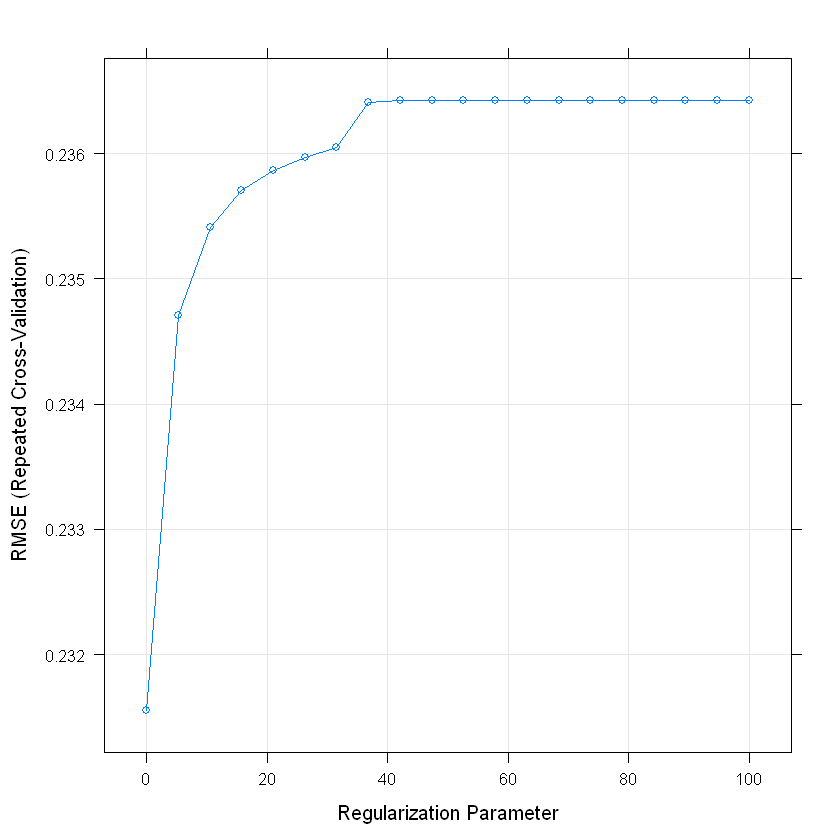

In [50]:
plot(ridge_reg_model_2)

#### Lasso Regression:

In [51]:
param_control = trainControl(method = 'repeatedcv', number = 10, repeats = 5)

lasso_model_2 = train(CARAVAN ~ ., data = train_df, method = 'glmnet', 
                      trControl = param_control, 
                      tuneGrid = expand.grid(alpha = 1, 
                                             lambda = seq(0.01, 100, length = 20)))

lasso_model_2

glmnet 

5822 samples
  85 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 5240, 5239, 5240, 5240, 5240, 5240, ... 
Resampling results across tuning parameters:

  lambda      RMSE       Rsquared    MAE      
    0.010000  0.2318471  0.04706669  0.1090262
    5.272632  0.2365375         NaN  0.1124183
   10.535263  0.2365375         NaN  0.1124183
   15.797895  0.2365375         NaN  0.1124183
   21.060526  0.2365375         NaN  0.1124183
   26.323158  0.2365375         NaN  0.1124183
   31.585789  0.2365375         NaN  0.1124183
   36.848421  0.2365375         NaN  0.1124183
   42.111053  0.2365375         NaN  0.1124183
   47.373684  0.2365375         NaN  0.1124183
   52.636316  0.2365375         NaN  0.1124183
   57.898947  0.2365375         NaN  0.1124183
   63.161579  0.2365375         NaN  0.1124183
   68.424211  0.2365375         NaN  0.1124183
   73.686842  0.2365375         NaN  0.1124183
   78.949474  0.2365375

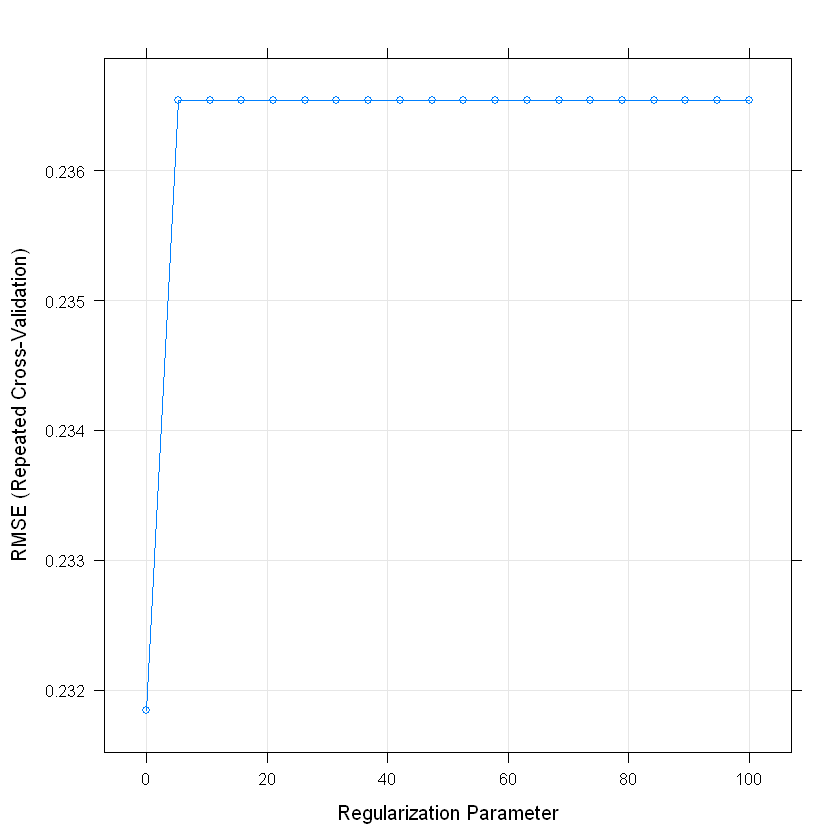

In [52]:
plot(lasso_model_2)

#### Conclusion:

#### Forward selection/stepwise selection performed well overall. That is because, apart from the model not being complex with just 23 independent variables, unlike in backward selection with 32 variables or ridge or lasso with around 86 independent variable, the error value is better for forward selection.

## Question 3:

#### Load train data:

In [53]:
X <- as.matrix(read.table(gzfile("zip.train")))

In [54]:
head(X)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257
6,-1,-1,-1,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1
5,-1,-1,-1,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1
4,-1,-1,-1,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1
7,-1,-1,-1,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1
3,-1,-1,-1,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1
6,-1,-1,-1,-1.000,-1.000,-0.397,0.983,-0.535,-1.000,...,0.803,0.015,-0.862,-0.871,-0.437,-1.000,-1.000,-1.000,-1.000,-1


In [55]:
dim(X)

[1] 7291  257

In [56]:
X_7_9 <- which(X[, 1] == 7 | X[, 1] == 9)

In [57]:
X.train <- X[X_7_9, -1]
y.train <- X[X_7_9, 1] == 7

In [58]:
table(y.train)

y.train
FALSE  TRUE 
  644   645 

#### Load test data:

In [59]:
X <- as.matrix(read.table(gzfile("zip.test")))

In [60]:
head(X)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257
9,-1,-1,-1,-1.000,-1.0,-0.948,-0.561,0.148,0.384,...,-1.000,-0.908,0.430,0.622,-0.973,-1.000,-1.000,-1,-1,-1
6,-1,-1,-1,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1,-1,-1
3,-1,-1,-1,-0.593,0.7,1.000,1.000,1.000,1.000,...,1.000,0.717,0.333,0.162,-0.393,-1.000,-1.000,-1,-1,-1
6,-1,-1,-1,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1,-1,-1
6,-1,-1,-1,-1.000,-1.0,-1.000,-1.000,-0.858,-0.106,...,0.901,0.901,0.901,0.290,-0.369,-0.867,-1.000,-1,-1,-1
0,-1,-1,-1,-1.000,-1.0,-1.000,0.195,1.000,0.054,...,0.224,1.000,0.988,0.187,0.139,-0.641,-0.812,-1,-1,-1


In [61]:
dim(X)

[1] 2007  257

In [62]:
X_7_9 <- which(X[, 1] == 7 | X[, 1] == 9)

In [63]:
X.test <- X[X_7_9, -1]
y.test <- X[X_7_9, 1] == 7

In [64]:
table(y.test)

y.test
FALSE  TRUE 
  177   147 

#### Linear Regression:

In [65]:
L <- lm(y.train ~ X.train)
yhat <- (cbind(1, X.test) %*% L$coef) >= 0.5
L.error <- mean(yhat != y.test)

#### KNN:

In [66]:
library(class)
k <- c(1, 3, 5, 7, 9, 11, 13, 15)
k.error <- rep(NA, length(k))
for (i in 1:length(k)) {
    yhat <- knn(X.train, X.test, y.train, k[i])
    k.error[i] <- mean(yhat != y.test)
}

#### Lets compare both models:

In [67]:
error <- matrix(c(L.error, k.error), ncol = 1)
colnames(error) <- c("Error Rate")
rownames(error) <- c("Linear Regression", paste("k-NN with k =", k))
error

,Error Rate
Linear Regression,NA
k-NN with k = 1,0.02469136
k-NN with k = 3,0.02469136
k-NN with k = 5,0.02469136
k-NN with k = 7,0.02777778
k-NN with k = 9,0.03703704
k-NN with k = 11,0.04012346
k-NN with k = 13,0.04012346
k-NN with k = 15,0.03703704


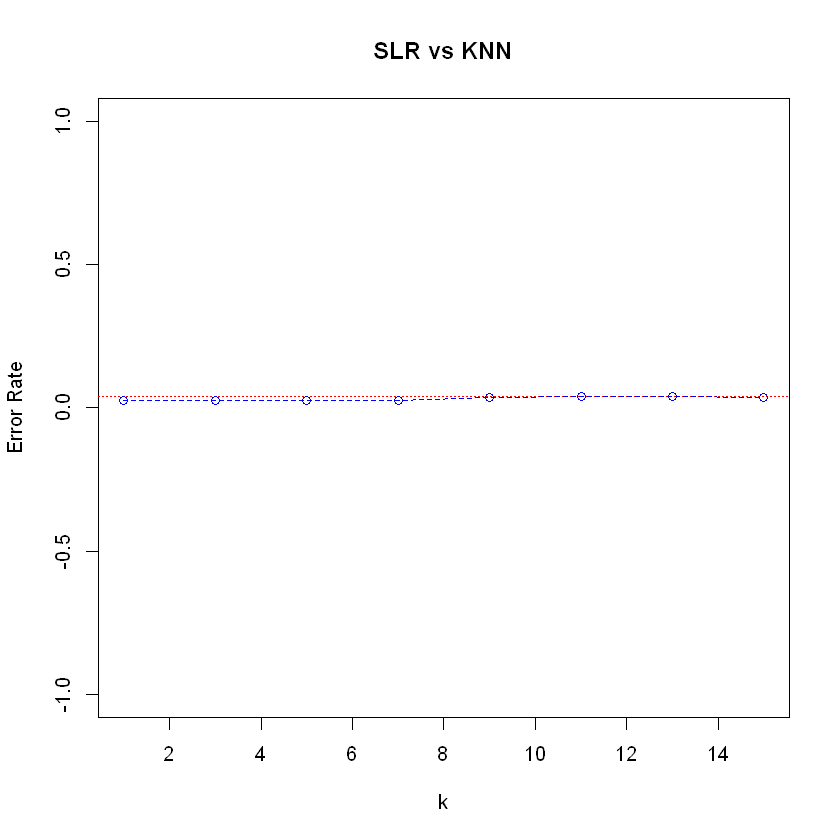

In [68]:
plot(c(1, 15), c(0, 1.1 * max(error)), type = "n", main = "SLR vs KNN", 
     ylab = "Error Rate", xlab = "k")
abline(h = 0.04121, col = 2, lty = 3)
points(k, k.error, col = 4)
lines(k, k.error, col = 4, lty = 2)

#### Conclusion:

#### Here, both linear regression and KNN are performing nearly same with __`red line`__ indicating __`SLR`__ and __`blue line`__ indicating __`KNN`__ error values respectively. Both models error rate is close to zero.

                                            ### END ###